# Feature Importance

Exercício com o dataset house prices

In [39]:
# importar as bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

pd.options.display.max_columns=100

In [38]:
# Requirements
import sklearn
print(pd.__version__)
print(sklearn.__version__)

1.4.2
1.0.2


In [5]:
# Objetivo:

# Determinar o preço de uma casa a partir de muitas variáveis ----> problema de regressão (SalePrice)

In [2]:
# Carregando o dataset

df = pd.read_csv('../datasets/house_prices.csv')

In [12]:
# EDA

# Inspeciona os dados (info, shape, type, transformação para data)
# dados nulos (faltantes), duplicados, distribuição, média, mediana, desvio padrão, correlação, outiliers, 
# gráficos (inclusive boxplot), dependência

In [23]:
# para esse exercício, vamos usar apenas colunas numéricas e tirar qualquer coluna que tenha algum valor faltante

df = df.select_dtypes(include=[np.number])
df.dropna(axis='columns', how='any', inplace=True)


In [31]:
# Determine quem é o target e quem são as features

X = df.drop(columns=['SalePrice','Id']) # feature OU
# X = df[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
#        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
#        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
#        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
#        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
#        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']] OU
# X = df.iloc[:,1:-1]
y = df['SalePrice'] # target OU
# y = df.SalePrice 

In [33]:
# Particionar os dados em treino e teste (e/ou validação)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# é interessante dar uma olhada nos dados depois do split

In [41]:
# Modelo -> instanciar e criar o objeto

rf = RandomForestRegressor(random_state=42)

# Treinar --> FIT
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Avaliar --> predict (O ideal é fazer nos dados de treino e teste para avaliar underfitting e overfitting)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Não vamos fazer matriz de confusão pois só é usada para classificação
# Usar r2, mse, mae, e todos os erros que achar interessante

In [44]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9783243610922434
0.8941815051693367


In [46]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

**FEATURE IMPORTANCE**

Feature importance do random forest mostra as features que tiveram maior peso nos splits das árvores com relação ao target

In [47]:
# 33 colunas
rf.feature_importances_

array([4.02482873e-03, 2.28468057e-02, 5.63752817e-01, 5.56032788e-03,
       2.14811018e-02, 1.24250177e-02, 3.57432040e-02, 1.17350227e-03,
       6.64195331e-03, 3.86205846e-02, 3.19477190e-02, 3.72114244e-02,
       1.26943751e-04, 1.27606597e-01, 1.33105087e-03, 2.03246848e-04,
       6.34780802e-03, 1.33402717e-03, 2.14060001e-03, 1.14515941e-03,
       8.64022859e-03, 4.11086622e-03, 1.40104171e-02, 2.04042387e-02,
       6.61374433e-03, 9.77292483e-03, 1.02043817e-03, 6.51197458e-04,
       3.73031576e-03, 1.34137195e-03, 1.37720381e-04, 5.50298732e-03,
       2.39882951e-03])

In [52]:
feature_importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importance

,importance
OverallQual,0.563753
GrLivArea,0.127607
TotalBsmtSF,0.038621
2ndFlrSF,0.037211
BsmtFinSF1,0.035743
1stFlrSF,0.031948
LotArea,0.022847
YearBuilt,0.021481
GarageArea,0.020404
GarageCars,0.014010


<AxesSubplot:xlabel='importance', ylabel='Features'>

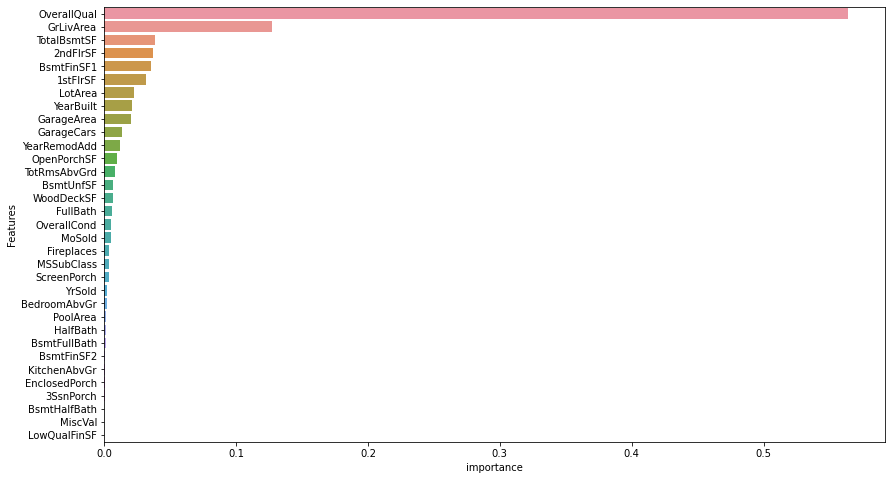

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14,8))
sns.barplot(x='importance', y='Features', data=feature_importance.reset_index().rename(columns={'index':'Features'}))

In [70]:
# retreinando com algumas variáveis mais importantes

X_train[feature_importance.index[:15]] #usando as n features mais importantes

rf.fit(X_train[feature_importance.index[:15]], y_train)

RandomForestRegressor(random_state=42)

In [71]:
print(rf.score(X_train[feature_importance.index[:15]], y_train))
print(rf.score(X_test[feature_importance.index[:15]], y_test))

0.9782451393978218
0.895574166389338


In [72]:
# Para casa: Ver a feature Importance XGBoost Classificação